# METIS Intro to Data Science Project

## By: Ben McGauhey

### Seattle, WA Fall-2017

# Exploratory Data Analysis
We will start by simply loading our dataframe from the pickle file we saved it as earlier, then we will explore some of the relationships between variables and create some visualizations to better understand the data.

In [1]:
import pandas as pd
import numpy as np          # As Always we import our libraries
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point
%matplotlib inline

In [2]:
df = pd.read_pickle('weatherAndCallData.pkl') # Get our dataframe up and running from our saved file

In [30]:
df.head()

,cad_event_number,longitude,latitude,formatted_time_x,homicide,robbery,assault,burglary,theft,car_theft,reckless_burning,fraud,vice,property,lewd_behavior,trespass,park_violation,liquor_violation,drive_by_shooting,narcotics,warrant_service,security_alarms,mental_health,disturbance,animals,suspicious_case,person_with_weapon,harbor_theft,casualty,harbor_boat_assist,harbor_dui,hazards,missing_person,missing_property,crowd_control,traffic_general,dui,traffic_minor,human_trafficking,99,b1,b2,b3,bs,c1,c2,c3,ccd,comm,cs,cty,d1,d2,d3,det,ds,e,e1,e2,e3,ep,es,f1,f2,f3,fs,g1,g2,g3,gs,h2,h3,inv,j1,j2,j3,js,k1,k2,k3,kcio07,ks,l1,l2,l3,lapt,ls,m1,m2,m3,ms,n,n1,n2,n3,np,ns,o1,o2,o3,os,q1,q2,q3,qs,r1,r2,r3,rs,s,s1,s2,s3,sctr1,sp,ss,tac3,trf,u1,u2,u3,us,w,w1,w2,w3,wp,ws,by_hour,formatted_time_y,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_24h,rain_today,snow_1h,snow_3h,snow_24h,snow_today,clouds_all,weather_description,squalls,sky_is_clear,broken_clouds,drizzle,few_clouds,fog,haze,heavy_intensity_drizzle,heavy_intensity_rain,heavy_intensity_shower_rain,heavy_snow,light_intensity_drizzle,light_intensity_shower_rain,light_rain,light_shower_snow,light_snow,mist,moderate_rain,overcast_clouds,proximity_thunderstorm,scattered_clouds,shower_rain,sky_is_clear,smoke,snow,thunderstorm,thunderstorm_with_heavy_rain,thunderstorm_with_light_rain,thunderstorm_with_rain,very_heavy_rain
0,17000056904,-122.325060,47.597930,2017-02-15 21:15:45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-02-15 21:00,2017-02-15 21:00:00,54,999,92,8,169,0,8.815,0,0,0,0,0,0,92,moderate rain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,16000050525,-122.345860,47.612990,2016-02-11 13:21:02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-02-11 13:00,2016-02-11 13:00:00,52,1022,100,2,222,0,0,0,0,0,0,0,0,90,overcast clouds,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,14000405538,-122.319282,47.549830,2014-12-07 14:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-12-07 14:00,2014-12-07 14:00:00,61,1017,52,4,203,0,0,0,0,0,0,0,0,40,scattered clouds,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,17000073072,-122.338860,47.661385,2017-02-28 17:10:27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-02-28 17:00,2017-02-28 17:00:00,44,1021,52,8,210,0,0,0,0,0,0,0,0,90,overcast clouds,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,17000298506,-122.311530,47.595870,2017-08-13 01:56:59,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-08-13 01:00,2017-08-13 01:00:00,60,1015,93,8,160,0,0,0,0,0,0,0,0,90,moderate rain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# Our intuition tells us that there is some predictive power in the location information contained within the latitude longitude columns and zone_beat categories.
Let's start by looking at a few maps to see where our events are occuring

In [3]:
mask = (df.theft == 1)
theftDF = df[mask]

In [7]:
theftDF

,cad_event_number,longitude,latitude,formatted_time_x,homicide,robbery,assault,burglary,theft,car_theft,...,scattered_clouds,shower_rain,sky_is_clear,smoke,snow,thunderstorm,thunderstorm_with_heavy_rain,thunderstorm_with_light_rain,thunderstorm_with_rain,very_heavy_rain
56787,14000385876,-122.298333,47.572561,2014-11-18 09:22:00,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
56788,16000092734,-122.372280,47.552860,2016-03-21 22:59:44,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
56789,17000337599,-122.319466,47.615242,2017-09-11 00:40:27,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
56790,15000111990,-122.304170,47.692557,2015-04-06 11:31:00,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
56791,15000111834,-122.277160,47.633344,2015-04-06 08:10:00,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
56792,16000311381,-122.325190,47.646520,2016-08-28 13:38:37,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
56793,15000407548,-122.388860,47.675278,2015-11-22 07:25:10,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
56794,14000408231,-122.320882,47.620492,2014-12-09 20:50:00,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
56795,14000276685,-122.349256,47.656661,2014-08-20 06:53:00,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
56796,15000159128,-122.408831,47.669536,2015-05-15 09:11:00,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
locations = mask[['latitude', 'longitude']]
locationlist = locations.values.tolist()

In [5]:
map = folium.Map(location=[47.713253, -122.355515], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)
map

TypeError: 'float' object is not iterable

### Our intuition tells us that the location data contained in zone/beat offer some some predictive power, let's explore those to start
We have an exceptionally wide dataframe though, so we will work some magic to just compare specific columns with each other, rather than the entire pairwise correlation for each variable.

In [8]:
list_1 = list(df.columns[39:128]) # Create a list of the column names for just the zone/beat columns
list_2 = list(df.columns[4:39]) # Create a list of just the crime column names

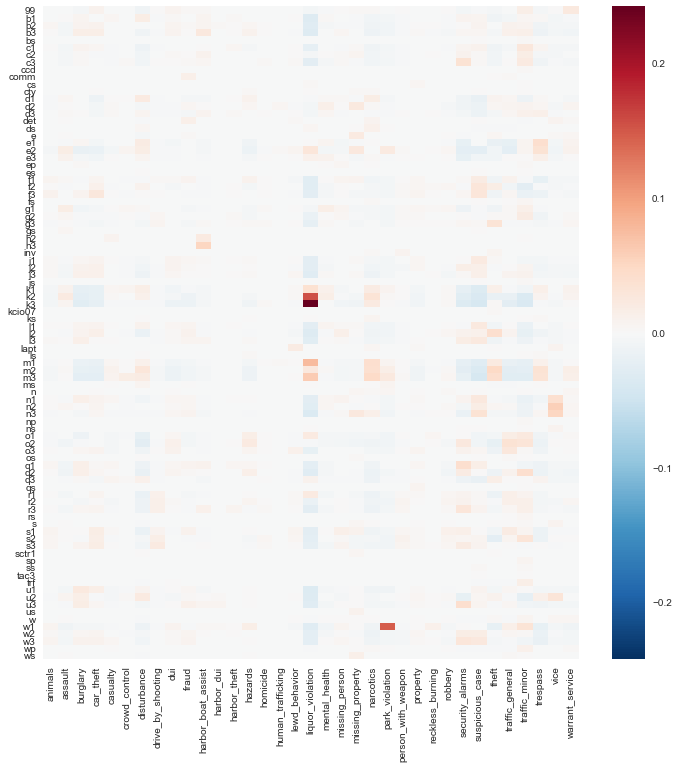

In [9]:
plotDict = {} # Create a dictionary for our plot values
for beat in list_1: # Loop across each of the two lists that contain the items we want to compare
    for event in list_2:
        tempDict = {(beat, event): scipy.stats.pearsonr(df[beat],df[event])} # Compare our two items
        plotDict.update(tempDict) # Update our plot dictionary
dfOutput = pd.Series(plotDict).unstack() # Unstack our dictionary into a series
dfOutputPearson = dfOutput.apply(lambda x: x.apply(lambda x:x[0]))

sns.set_style('whitegrid') # Set our style
fig, ax = plt.subplots()
fig.set_size_inches(12, 12) # Make it big enough to read the column names
sns.heatmap(dfOutputPearson) # Plot a heatmap using the pearson coefficient datafram we made earlier


### Well, it looks as though we are seeing stronger corrleation between liquor and park violations and the zone/beat but nothing is really very strongly correlated, all less than +- .2, which is a small pearson coeffecient
These make sense, as bars and parks can be much more frequent in some beats than others, We also see some small correlation between alarms and suspicious people in certain zones. This also makes sense, possibly residential areas. We don't see any smoking guns predictively, but we definitely see nothing shocking, which is good. We can trust what we see here.

In [10]:
dfOutput.max()

animals                (0.00974989852879, 6.3314402717e-20)
assault                (0.0225823189581, 1.86559205809e-99)
burglary               (0.0243198754977, 4.8332402029e-115)
car_theft             (0.0273112608234, 1.41853138876e-144)
casualty                (0.00962036491427, 1.931329973e-19)
crowd_control          (0.0175713422631, 5.98867032685e-61)
disturbance           (0.0288623310802, 3.11962992631e-161)
drive_by_shooting      (0.0225790813207, 1.98968800545e-99)
dui                    (0.0125180224343, 8.60957235467e-32)
fraud                  (0.0138704351032, 1.20775728415e-38)
harbor_boat_assist                   (0.0522134322515, 0.0)
harbor_dui            (0.00670332583489, 3.32302995236e-10)
harbor_theft          (0.00624664048364, 4.77429253021e-09)
hazards                (0.0221652436252, 6.93132165109e-96)
homicide              (0.00561039978052, 1.45228784631e-07)
human_trafficking     (0.00380247698683, 0.000365294054917)
lewd_behavior          (0.0201146801505,

### Let's explore what effect the weather has, using the same method

In [11]:
df.columns

Index(['cad_event_number', 'longitude', 'latitude', 'formatted_time_x',
       'homicide', 'robbery', 'assault', 'burglary', 'theft', 'car_theft',
       ...
       'scattered_clouds', 'shower_rain', 'sky_is_clear', 'smoke', 'snow',
       'thunderstorm', 'thunderstorm_with_heavy_rain',
       'thunderstorm_with_light_rain', 'thunderstorm_with_rain',
       'very_heavy_rain'],
      dtype='object', length=175)

In [15]:
list_1 = df.columns[130:-1] # Create a list of the column names for just the weather columns
list_2 = df.columns[4:39] # Create a list of just the crime column names

In [16]:
plotDict = {} # Create a dictionary for our plot values
for weather in list_1: # Loop across each of the two lists that contain the items we want to compare
    for event in list_2:
        tempDict = {(weather, event): scipy.stats.pearsonr(df[weather],df[event])} # Compare our two items
        plotDict.update(tempDict) # Update our plot dictionary
dfOutput = pd.Series(plotDict).unstack() # Unstack our dictionary into a series
dfOutputPearson = dfOutput.apply(lambda x: x.apply(lambda x:x[0]))

sns.set_style('whitegrid') # Set our style
fig, ax = plt.subplots()
fig.set_size_inches(12, 12) # Make it big enough to read the column names
sns.heatmap(dfOutputPearson) # Plot a heatmap using the pearson coefficient datafram we made earlier


TypeError: must be str, not float

In [28]:
pd.set_option('display.max_columns', 200) # Set our options so we can see some more of the data by scrolling
pd.set_option('display.max_row', 200)

In [29]:
df.dtypes

cad_event_number                         int64
longitude                              float64
latitude                               float64
formatted_time_x                datetime64[ns]
homicide                                 uint8
robbery                                  uint8
assault                                  uint8
burglary                                 uint8
theft                                    uint8
car_theft                                uint8
reckless_burning                         uint8
fraud                                    uint8
vice                                     uint8
property                                 uint8
lewd_behavior                            uint8
trespass                                 uint8
park_violation                           uint8
liquor_violation                         uint8
drive_by_shooting                        uint8
narcotics                                uint8
warrant_service                          uint8
security_alar

In [22]:
names = df.columns

In [23]:
names = names[4:-1]

In [26]:
df[names] = df[names].astype('int64', errors='raise')

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Period'